In [5]:

import pandas as pd


In [7]:
df=pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [10]:
df.shape



(8807, 12)

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [12]:
df.describe()


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [13]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [14]:
#check missing value
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [15]:
# Fill missing director and cast with 'Unknown'
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

# Fill missing country with 'Unknown'
df['country'] = df['country'].fillna('Unknown')

# Fill missing date_added with 'Unknown' (or could convert to datetime and fill with a default date)
df['date_added'] = df['date_added'].fillna('Unknown')

# Fill missing rating with mode
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

# Fill missing duration with mode
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])


In [16]:
# Verify no missing values remain
df.isnull().sum()


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [17]:
!pip install matplotlib seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------------------------ --------------- 5.0/8.1 MB 25.2 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 22.7 MB/s eta 0:00:00
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 25.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   --------------------------------- ------ 5.8/7.0 MB 27.1 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 23.9 MB/s eta 0:00:00
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

   ---------------------------------------- 0/8 [p

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


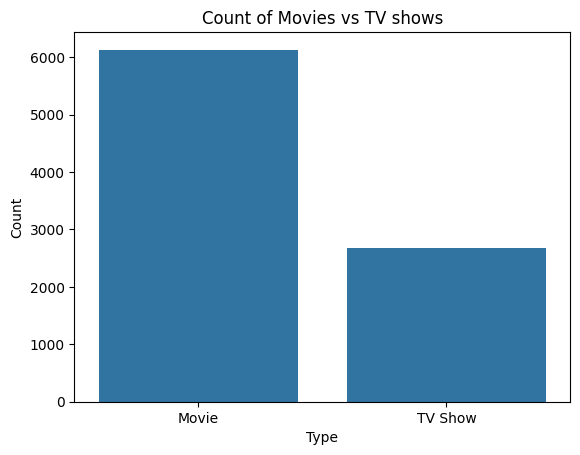

In [19]:
sns.countplot(data=df, x='type')
plt.title('Count of Movies vs TV shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

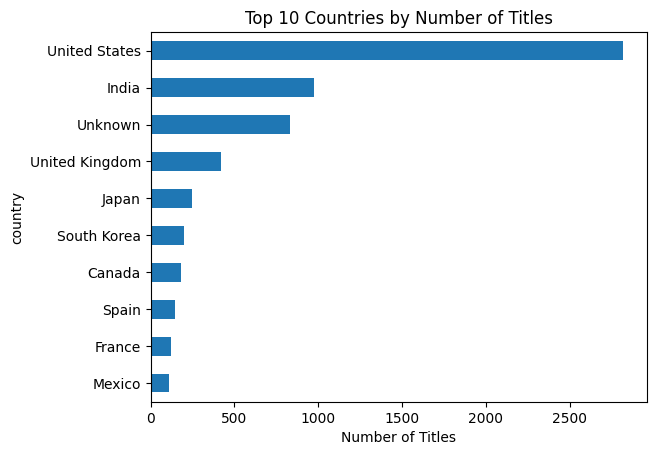

In [20]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', title='Top 10 Countries by Number of Titles')
plt.xlabel('Number of Titles')
plt.gca().invert_yaxis()
plt.show()


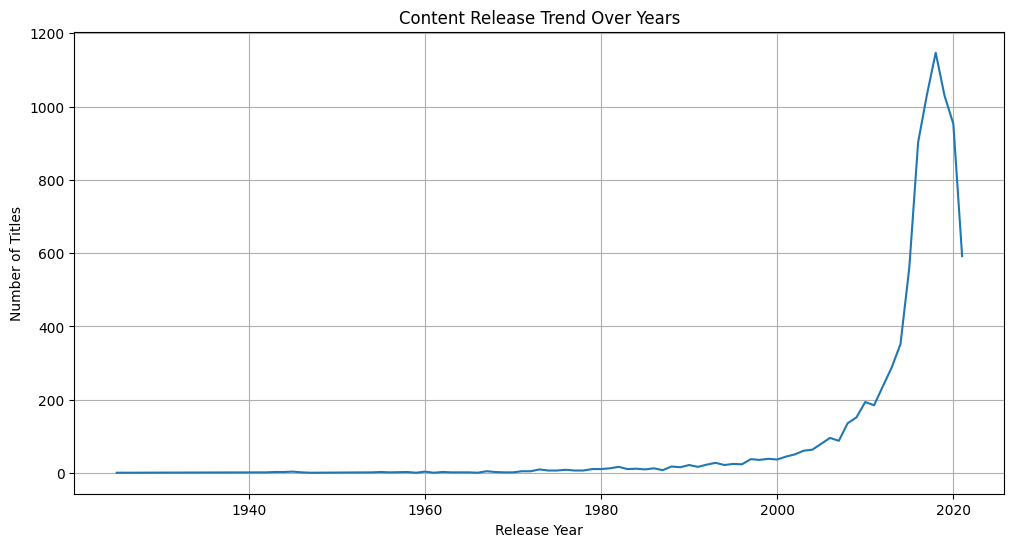

In [22]:
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(12,6))
plt.title('Content Release Trend Over Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()


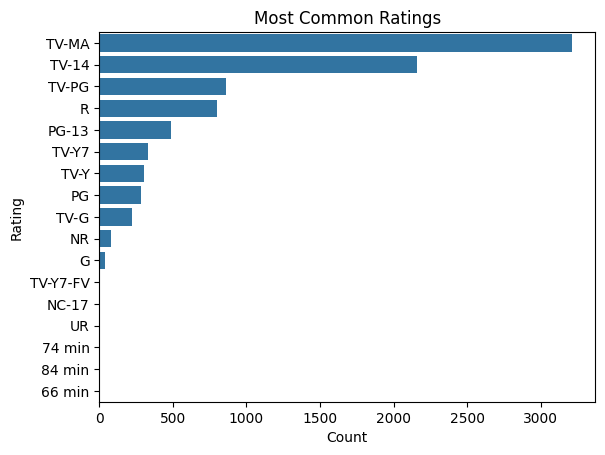

In [23]:
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)
plt.title('Most Common Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()


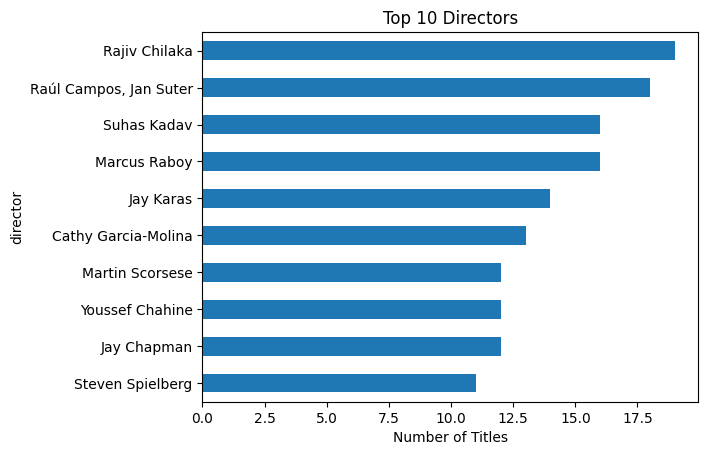

In [24]:
top_directors = df[df['director'] != 'Unknown']['director'].value_counts().head(10)
top_directors.plot(kind='barh', title='Top 10 Directors')
plt.xlabel('Number of Titles')
plt.gca().invert_yaxis()
plt.show()


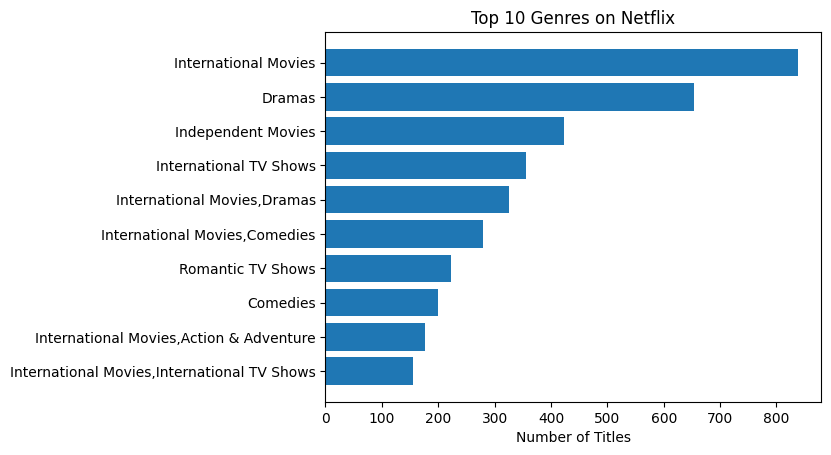

In [25]:
from collections import Counter

# Split genres and count
all_genres = ','.join(df['listed_in']).split(', ')
genre_counts = Counter(all_genres)
top_genres = dict(sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)[:10])

# Plot
plt.barh(list(top_genres.keys()), list(top_genres.values()))
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.gca().invert_yaxis()
plt.show()


In [26]:
df.to_csv('netflix_cleaned.csv', index=False)
